# Loading

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [4]:
# Load JSON file
file_path = "C:/Users/Patron/Desktop/ABC/hub_quick_guide_logs.json"

In [7]:
with open(file_path, "r") as file:
    data = json.load(file)

# EDA

In [10]:
# Convert to DataFrame
df = pd.DataFrame(data)


In [13]:
# Display basic info
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            1611 non-null   object             
 1   login_utc     1611 non-null   datetime64[ns]     
 2   source        1611 non-null   object             
 3   tile_id       1611 non-null   object             
 4   tile_name     1611 non-null   object             
 5   clicked_at    1611 non-null   datetime64[ns, UTC]
 6   file_name     1611 non-null   object             
 7   _rid          1611 non-null   object             
 8   _self         1611 non-null   object             
 9   _etag         1611 non-null   object             
 10  _attachments  1611 non-null   object             
 11  _ts           1611 non-null   int64              
 12  user_id       1611 non-null   object             
 13  login_date    1611 non-null   object         

In [14]:
# Display first few rows
print("\nSample Data:")
print(df.head())



Sample Data:
                                     id                  login_utc   source  \
0  d869b812-dde1-4cea-aec1-27c717c71128 2023-09-02 00:49:21.249038  TABLEAU   
1  e4c576b9-acf9-412c-a356-e529864cddfc 2023-09-27 13:17:46.903761  TABLEAU   
2  110b2adc-6da4-4b2e-910f-79ccc3f5c56a 2023-09-27 14:18:01.548325  TABLEAU   
3  8e703659-4a78-4df2-b882-3f30f97b65e2 2023-09-27 19:37:30.939849  TABLEAU   
4  e73f1518-12d7-479c-a7fd-bd3fc43f6b0f 2023-09-27 19:31:36.191205  TABLEAU   

                                tile_id                     tile_name  \
0  374921ac-0601-4f03-be6b-bb700c116f35                   Daily Sales   
1  374921ac-0601-4f03-be6b-bb700c116f35                   Daily Sales   
2  09a1719f-a47b-4556-8d6e-34b4f28a455c                  Customer 360   
3  796d6612-d799-48c1-b22b-31600329ced5                Branch Summary   
4  24372bd0-6f3a-4729-a553-a5e381df5ff9  Inventory Finder - All items   

                        clicked_at                               file_na

In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
id              0
login_utc       0
source          0
tile_id         0
tile_name       0
clicked_at      0
file_name       0
_rid            0
_self           0
_etag           0
_attachments    0
_ts             0
user_id         0
login_date      0
click_date      0
dtype: int64


In [16]:
# Convert datetime fields
df["login_utc"] = pd.to_datetime(df["login_utc"])
df["clicked_at"] = pd.to_datetime(df["clicked_at"])

In [17]:
# Extract date for trend analysis
df["login_date"] = df["login_utc"].dt.date
df["click_date"] = df["clicked_at"].dt.date

# Visualizations 

In [20]:
sns.set_style("whitegrid")


C:\Users\Patron\AppData\Local\Temp\ipykernel_38364\3938235701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dashboards.values, y=top_dashboards.index, palette="coolwarm")


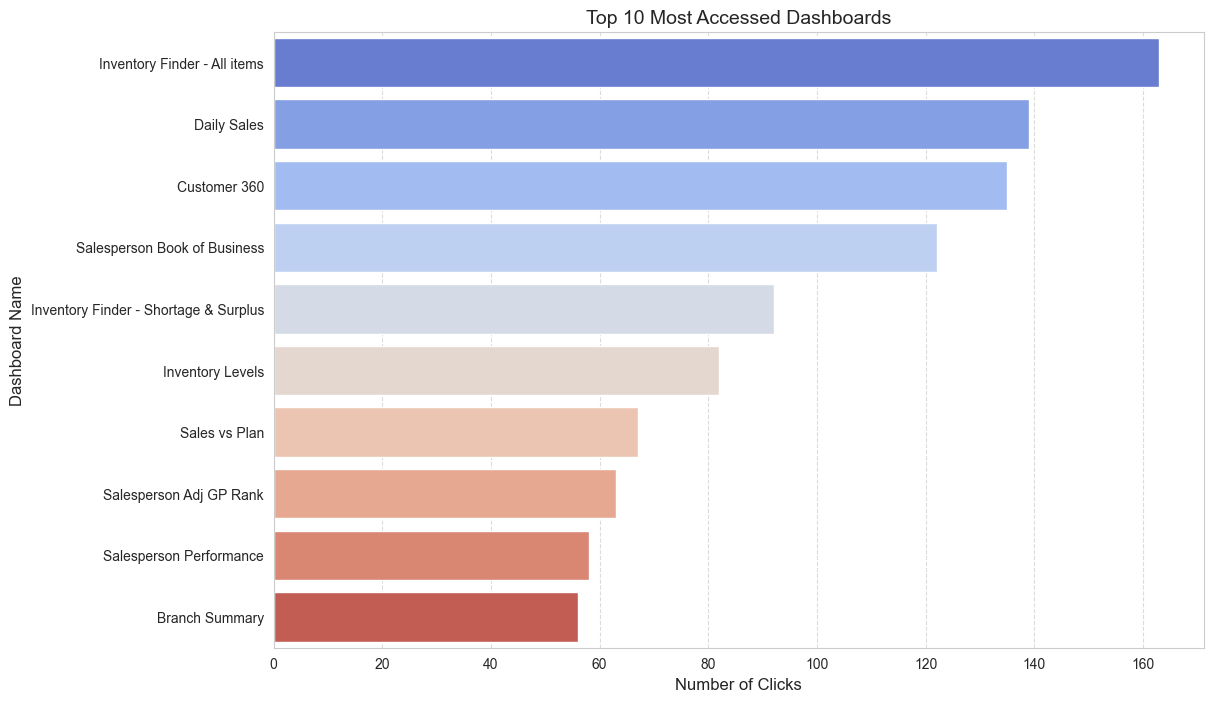

In [39]:
# 1. Most accessed dashboards (Top 10 for better readability)

plt.figure(figsize=(12, 8))
top_dashboards = df["tile_name"].value_counts().head(10)  # Limit to Top 10
sns.barplot(x=top_dashboards.values, y=top_dashboards.index, palette="coolwarm")

plt.title("Top 10 Most Accessed Dashboards", fontsize=14)
plt.xlabel("Number of Clicks", fontsize=12)
plt.ylabel("Dashboard Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()


### What It Shows:
##### This bar chart displays the top 10 most accessed dashboards based on the number of times users clicked on them.
##### It helps identify which dashboards are most frequently used and possibly the most critical for decision-making.
### Key Insights 
##### Which dashboards are accessed the most?
##### Are certain dashboards used significantly more than others?
##### Could high usage indicate a need for better training, enhancements, or additional insights?

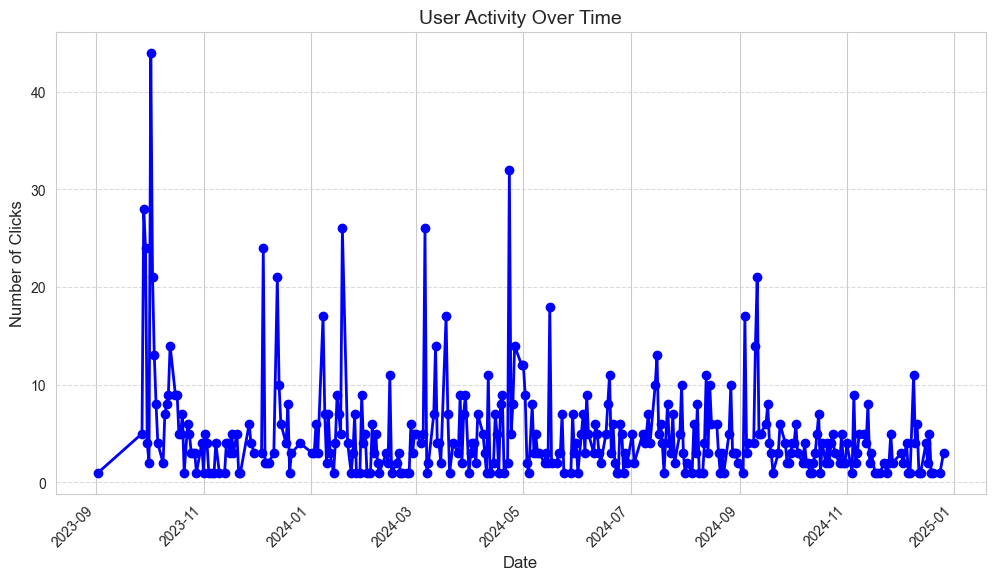

In [45]:
# 2. User activity over time
plt.figure(figsize=(12, 6))
df["click_date"].value_counts().sort_index().plot(kind="line", marker="o", color="b", linewidth=2)

plt.title("User Activity Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Clicks", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What It Shows
##### This line chart tracks the number of clicks on Quick Guides over time (daily basis).
##### It helps identify trends in user engagement with guides—whether usage is increasing, decreasing, or seasonal.
### Key Insights to Look For
##### Are there spikes in usage on certain days (e.g., start or end of the month)?
##### Are users consistently engaging with guides, or do they drop off after an initial period?
##### Are there patterns that could indicate confusion with dashboards (e.g., sudden increase in guide clicks)?

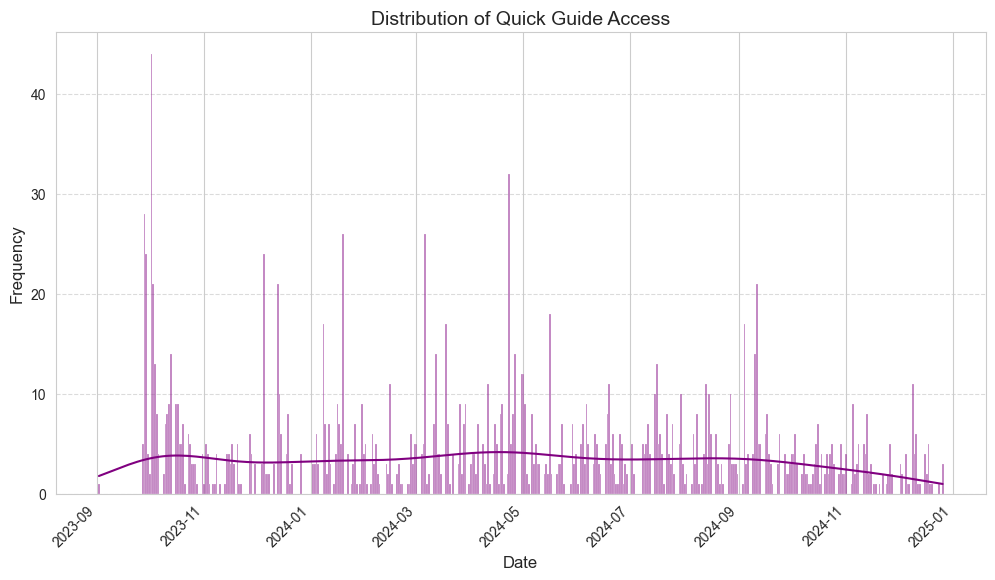

In [46]:
# 3. Distribution of Quick Guide Access
plt.figure(figsize=(12, 6))
sns.histplot(df["click_date"], bins=20, kde=True, color="purple")

plt.title("Distribution of Quick Guide Access", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What It Shows
##### This histogram visualizes how often Quick Guides were accessed over time.
##### It helps understand whether guide usage is evenly distributed or clustered in specific periods.
### Key Insights to Look For:
##### Is guide access consistent, or are there spikes in specific time periods?
##### Do new dashboard releases correlate with higher guide usage?
##### If usage is high initially but declines, it may indicate that users are learning and no longer need guides.

C:\Users\Patron\AppData\Local\Temp\ipykernel_38364\480133489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")


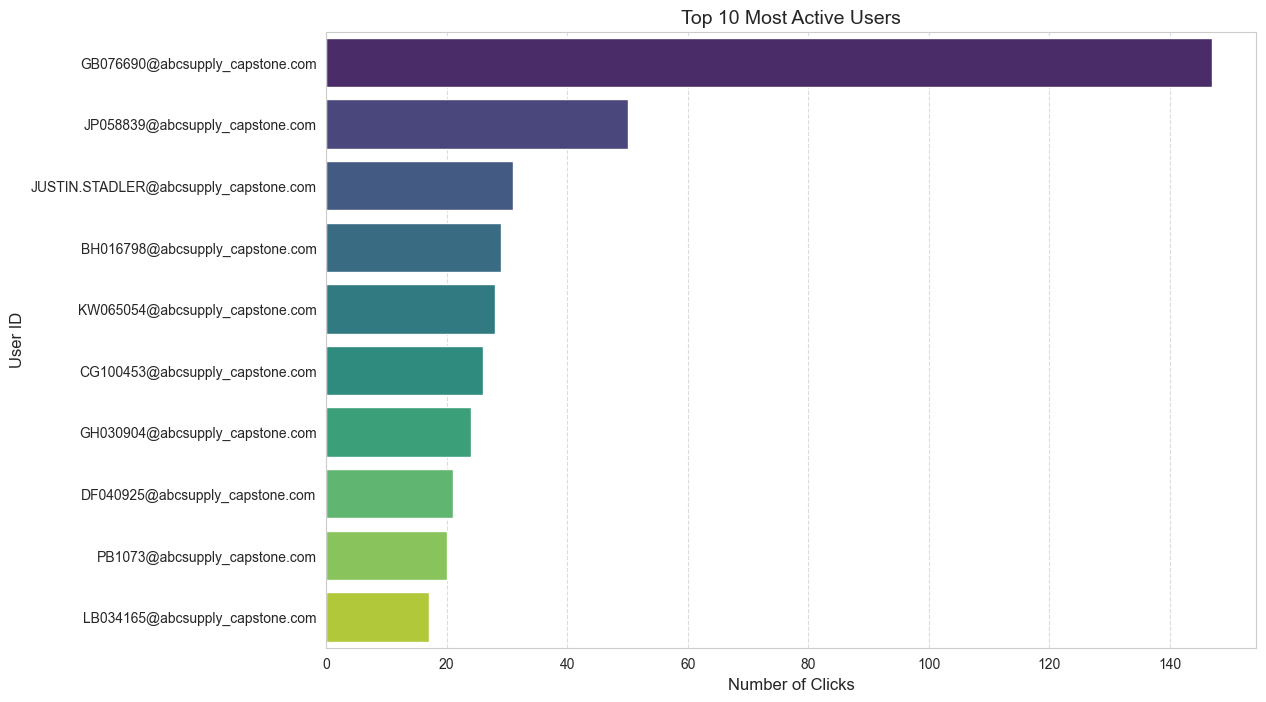

In [26]:
#4. Top 10 Most Active Users
plt.figure(figsize=(12, 8))
top_users = df["user_id"].value_counts().head(10)  # Top 10 users by activity
sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")

plt.title("Top 10 Most Active Users", fontsize=14)
plt.xlabel("Number of Clicks", fontsize=12)
plt.ylabel("User ID", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


### What it shows
##### This bar chart identifies the top 10 users who accessed Quick Guides the most.
##### It helps reveal power users or teams that rely heavily on guides.
### Key Questions to Answer
##### Who are the most active users of Quick Guides?
##### Do specific users or teams require additional support or training?

C:\Users\Patron\AppData\Local\Temp\ipykernel_38364\1163688083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="mako")


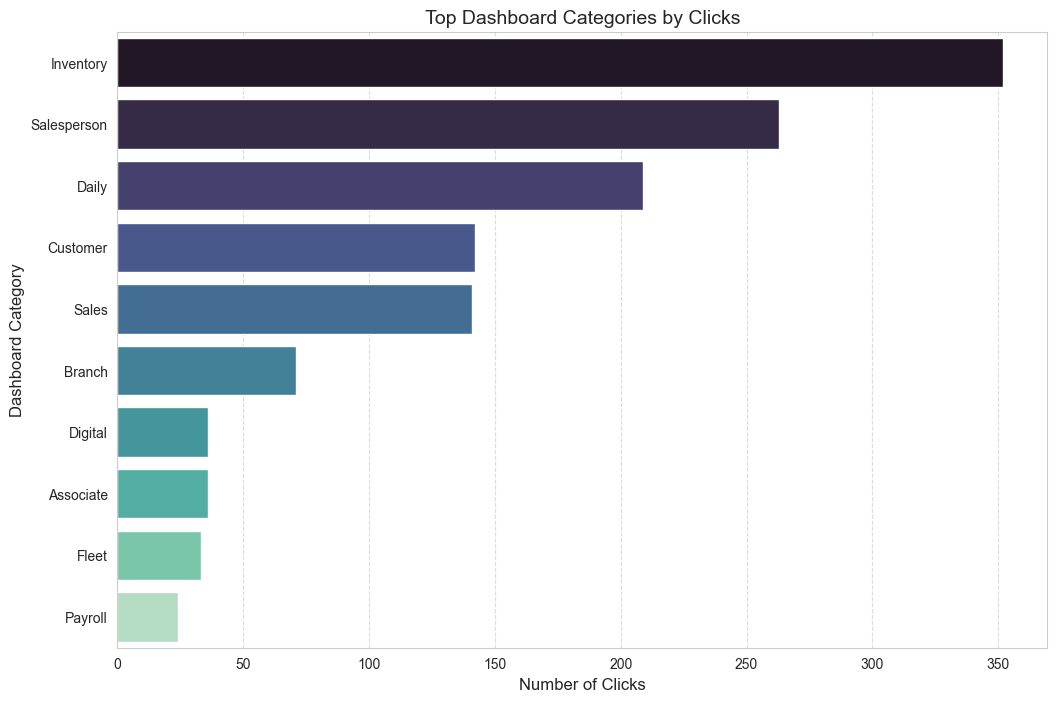

In [41]:
#5. Clicks by Dashboard Category (Still Working)
# Extract dashboard categories from "tile_name" (assuming categories are the first word)
df["category"] = df["tile_name"].str.split().str[0]

plt.figure(figsize=(12, 8))
category_counts = df["category"].value_counts().head(10)  # Top 10 categories
sns.barplot(x=category_counts.values, y=category_counts.index, palette="mako")

plt.title("Top Dashboard Categories by Clicks", fontsize=14)
plt.xlabel("Number of Clicks", fontsize=12)
plt.ylabel("Dashboard Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### What it shows:
##### If dashboards follow a naming pattern, this groups and visualizes access by category (e.g., "Sales," "Inventory").
### Key Questions to Answer:
##### Which types of dashboards are accessed most frequently?
##### Are users more focused on sales, customer analytics, or forecasting?

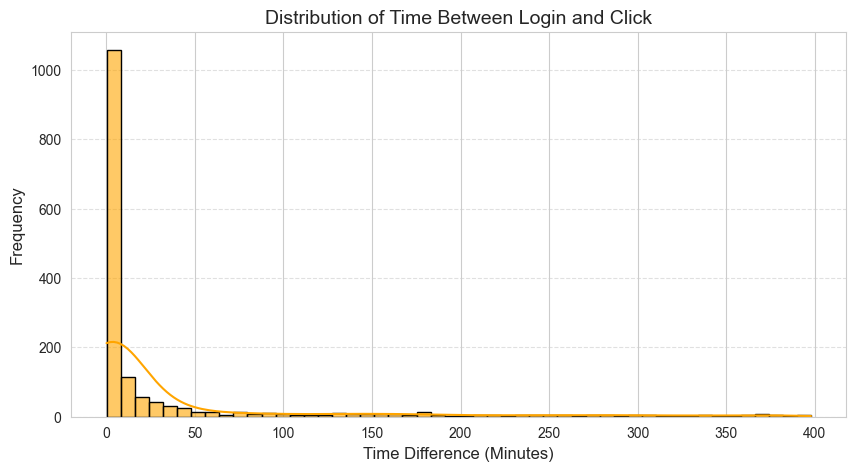

In [36]:
#6. Average Time Between Login and Click

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert timestamps to datetime format
df["login_utc"] = pd.to_datetime(df["login_utc"]).dt.tz_localize(None)
df["clicked_at"] = pd.to_datetime(df["clicked_at"]).dt.tz_localize(None)

# Calculate time difference in minutes
df["time_diff"] = (df["clicked_at"] - df["login_utc"]).dt.total_seconds() / 60  

# Filter out extreme values beyond 99th percentile
upper_limit = df["time_diff"].quantile(0.99)  # Adjust percentile if needed
lower_limit = df["time_diff"].quantile(0.01)  # Avoid extreme negatives

df_filtered = df[(df["time_diff"] >= lower_limit) & (df["time_diff"] <= upper_limit)]

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered["time_diff"], bins=50, kde=True, color="orange", edgecolor="black", alpha=0.6)

# Improve formatting
plt.xlabel("Time Difference (Minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Time Between Login and Click", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


### What it shows
##### This visualization shows the time delay between a user's login and their click on a Quick Guide.
##### Large gaps may suggest that users struggle to find what they need.
### Key Questions to Answer
##### Do users access Quick Guides immediately after logging in?
##### Are there delays suggesting confusion or difficulty finding information?

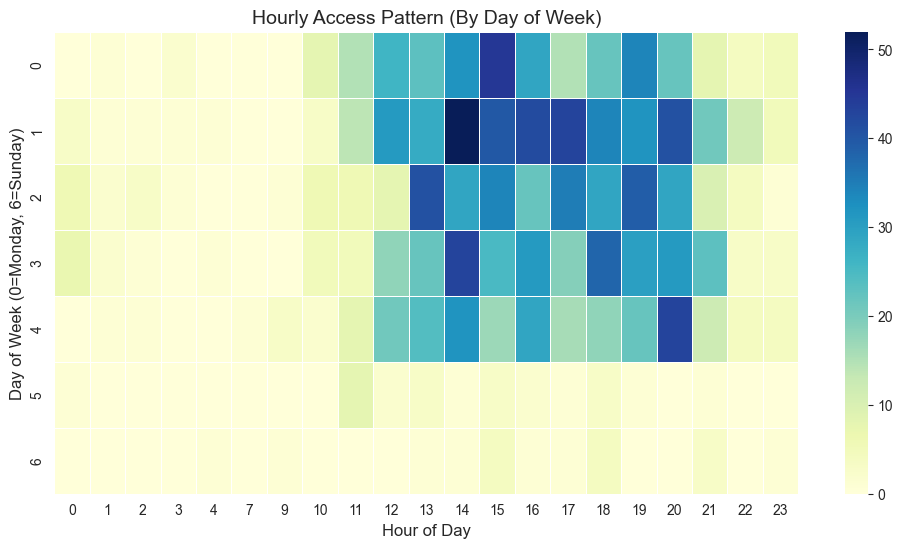

In [32]:
#7. Hourly Access Pattern

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime fields are timezone-naive
df["clicked_at"] = pd.to_datetime(df["clicked_at"]).dt.tz_localize(None)

# Extract day and hour for heatmap
df["hour"] = df["clicked_at"].dt.hour
df["day_of_week"] = df["clicked_at"].dt.dayofweek  # 0=Monday, 6=Sunday

# Pivot for heatmap
hourly_usage = df.pivot_table(index="day_of_week", columns="hour", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_usage, cmap="YlGnBu", linewidths=0.5)

plt.title("Hourly Access Pattern (By Day of Week)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week (0=Monday, 6=Sunday)", fontsize=12)
plt.show()



### What it shows
##### This heatmap displays guide usage by hour of the day across the week.
##### Helps identify peak activity times when users need the most assistance.
### Key Questions to Answer
##### When do users access guides the most (e.g., morning or afternoon)?
##### Are there off-peak hours where fewer users engage with guides?

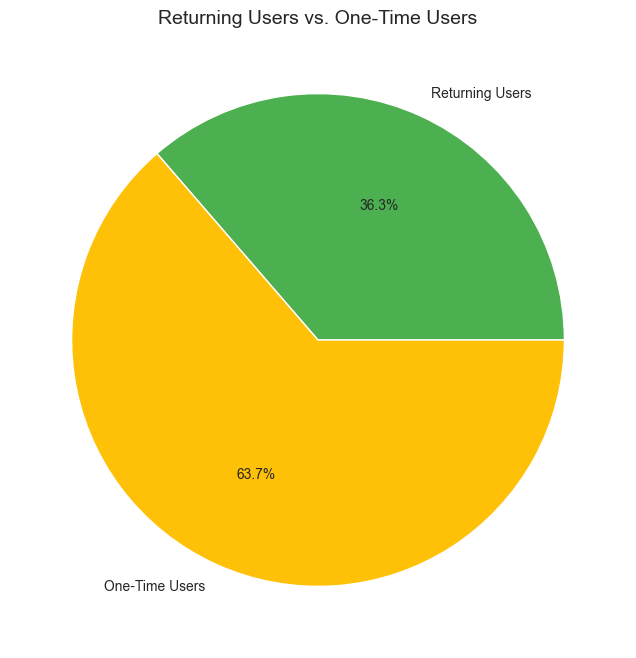

In [30]:
#8. Returning Users vs. One-Time Users

# Identify returning vs. one-time users
user_click_counts = df["user_id"].value_counts()
returning_users = user_click_counts[user_click_counts > 1].count()
one_time_users = user_click_counts[user_click_counts == 1].count()

# Plot
plt.figure(figsize=(8, 8))
plt.pie([returning_users, one_time_users], labels=["Returning Users", "One-Time Users"], autopct="%1.1f%%", colors=["#4CAF50", "#FFC107"])
plt.title("Returning Users vs. One-Time Users", fontsize=14)
plt.show()


### What it shows
##### This pie chart visualizes the proportion of repeat vs. one-time guide users.
##### Helps measure user retention and whether users return to guides frequently.
### Key Questions to Answer
##### Do most users return to Quick Guides, or are they one-time users?
##### Are users getting the information they need in a single session?

In [38]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have a figure before saving
with PdfPages("quick_guide_report.pdf") as pdf:
    plt.figure(figsize=(10, 5))  # Explicitly create a figure
    
    sns.histplot(df_filtered["time_diff"], bins=50, kde=True, color="orange", edgecolor="black", alpha=0.6)
    
    plt.xlabel("Time Difference (Minutes)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Distribution of Time Between Login and Click", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    pdf.savefig()  # Save the figure
    plt.close()  # Close the figure to avoid overlapping

